In [11]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import optimize
import pandas

In [12]:
#Data from scienscano https://epistat.wiv-isp.be/covid/ from March 1st to May 18th (2020)
#IR_data contains data on the variable I+R in the SIR-model
#t_data simply contains the days numbered as [0, 1, 2, ...]
IR_data = np.array([2564, 3098, 3811, 4473, 4942, 5428, 6756, 7951, 9150, 10513, 12031, 12875, 13558, 15296, 16977, 18493, 19971, 21665, 22587, 23252, 25186, 26701, 28299, 30538, 32874, 33903, 34427, 34964, 36524, 38157, 39831, 41225, 41947, 42390, 43666, 44936, 45713, 46689, 47500, 47888, 48093, 48848, 49417, 49939, 50525, 50762, 51048, 51188, 51858, 52404, 52956, 53398, 53881, 54121, 54239, 54715, 55110, 55431, 55736, 56082, 56229, 56310, 56627])
t_data = np.arange(0,len(IR_data),1)

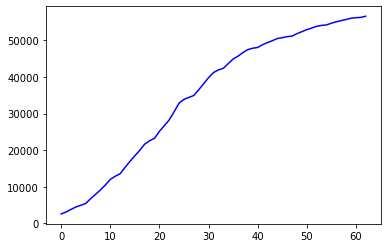

In [25]:
#Visualize data
fig, ax = plt.subplots(1)
ax.plot(t_data,IR_data, 'b')

In [18]:
def model(t_array, beta, gamma):
    a = 10000
    delta_t = 1/a  #time step for Euler method
    
    #fraction (0.005) of population of Belgium (11.46*10**6).
    #We only consider a small fraction since many people stay isolated, don't have symptoms
    N = 11.46 * 10**6 * 0.005
    

    max_time = len(t_array)
    #New time array to apply Euler method later on
    new_t_array = np.arange(0,max_time-1+delta_t,delta_t)

    S = np.empty(len(new_t_array))
    I = np.empty(len(new_t_array))
    R = np.empty(len(new_t_array))
    
    S[0] = N
    #Approximation of I[0] based on data
    I[0] = 500
    #Approximation of R[0] based on data
    R[0] = 2000
    
    #Euler method to determine S, I, R
    for t in range(len(new_t_array)-1):
        S[t+1] = S[t] + delta_t * (-beta*S[t]*I[t]/N)
        I[t+1] = I[t] + delta_t * (beta*S[t]*I[t]/N-gamma*I[t])
        R[t+1] = R[t] + delta_t * (gamma*I[t])
        
    #Fitting the S, I, R on the t_data
    S_on_t_array = S[0:len(new_t_array):a]
    I_on_t_array = I[0:len(new_t_array):a]
    R_on_t_array = R[0:len(new_t_array):a]
    return I_on_t_array + R_on_t_array

In [19]:
# Applying the curve fitting from SciPy package
from scipy.optimize import curve_fit
init_vals=[0.3,0.2]
best_vals, covar = curve_fit(model, t_data, IR_data, p0 = init_vals, maxfev = 1000)

In [22]:
# Printing the least squares estimatetd parameters
best_vals, covar

(array([0.32912258, 0.13614549]),
 array([[8.21913779e-05, 6.49931882e-05],
        [6.49931882e-05, 5.52285028e-05]]))

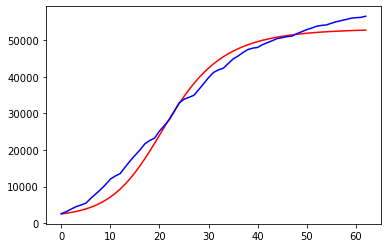

In [26]:
# Plotting the I+R data and comparing it to the model prediction
output = model(t_data, best_vals[0], best_vals[1])
fig, axs = plt.subplots(1)
axs.plot(t_data,output, 'r')
axs.plot(t_data,IR_data,color = 'b')